# IIOT GROUP 4 PROJECT


# RETAIL SALES PREDICTION

### Used libraries

In [ ]:
#importing libraries 
import pandas as pd
import numpy as ny
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

### Datasets

In [ ]:
train=pd.read_csv(r'C:\Users\om\OneDrive\Documents\train.csv.xls')

In [ ]:
features=pd.read_csv(r'C:\Users\om\OneDrive\Documents\features.csv.xls')

In [ ]:
store=pd.read_csv(r'C:\Users\om\OneDrive\Documents\stores.csv.xls')

### Merging datasets 

In [ ]:
for df in [train, features, store]:
    df.columns = df.columns.str.strip()

In [ ]:
data=train.merge(features, on=['Store', 'Date'], how='right')

In [ ]:
data = data.merge(store, on='Store', how='right')

In [ ]:
#dataset after merging

In [ ]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5.0,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,NaN,2013-06-28,NaN,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
423321,45,NaN,2013-07-05,NaN,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
423322,45,NaN,2013-07-12,NaN,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
423323,45,NaN,2013-07-19,NaN,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


# Features Engineering 

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['Year'] = data['Date'].dt.year

In [ ]:
data['Month'] = data['Date'].dt.month

In [ ]:
data['Week'] = data['Date'].dt.isocalendar().week

In [ ]:
# Return first 5 rows by using pandas libraries

In [ ]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,2,5
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,2,5
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,2,5
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,2,5
4,1,5.0,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,2,5


In [ ]:
# Analyzing merge dataset

In [ ]:
### Checking the structure, data types, and missing values of the merged dataset to understand its shape and quality.

In [ ]:
## info- getting info about number of rows ,column and datatype

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         423325 non-null  int64         
 1   Dept          421570 non-null  float64       
 2   Date          423325 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  object        
 5   Temperature   423325 non-null  float64       
 6   Fuel_Price    423325 non-null  float64       
 7   MarkDown1     152433 non-null  float64       
 8   MarkDown2     112532 non-null  float64       
 9   MarkDown3     138658 non-null  float64       
 10  MarkDown4     136466 non-null  float64       
 11  MarkDown5     153187 non-null  float64       
 12  CPI           422740 non-null  float64       
 13  Unemployment  422740 non-null  float64       
 14  IsHoliday_y   423325 non-null  bool          
 15  Type          423

In [ ]:
#shape -It give shape (rows ,column)

In [ ]:
df.shape

(45, 3)

In [ ]:
#column() - it gives column names of dataset

In [ ]:
df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [ ]:
# duplicate() - when the data is same then it shows * True or the data is not same then its shows *False

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
dtype: bool

In [ ]:
## unique() -to convert date unique number date

In [ ]:
data['Date'].unique()

<DatetimeArray>
['2010-02-05 00:00:00', '2010-02-12 00:00:00', '2010-02-19 00:00:00',
 '2010-02-26 00:00:00', '2010-03-05 00:00:00', '2010-03-12 00:00:00',
 '2010-03-19 00:00:00', '2010-03-26 00:00:00', '2010-04-02 00:00:00',
 '2010-04-09 00:00:00',
 ...
 '2013-05-24 00:00:00', '2013-05-31 00:00:00', '2013-06-07 00:00:00',
 '2013-06-14 00:00:00', '2013-06-21 00:00:00', '2013-06-28 00:00:00',
 '2013-07-05 00:00:00', '2013-07-12 00:00:00', '2013-07-19 00:00:00',
 '2013-07-26 00:00:00']
Length: 182, dtype: datetime64[ns]

In [ ]:
## isnull is used for finding null value in data

In [ ]:
data.isnull().sum()

Store                0
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday_x       1755
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_y          0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
dtype: int64

In [ ]:
## fillna function is used for filling null value by 0

In [ ]:
data.fillna(0, inplace=True)

## DATA ENCODING

In [ ]:
## encoding used for assign unique integer to outlable

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_cols = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

### Feature select

In [ ]:
## This setup is great for preparing data before applying models like linear regression, decision trees, or random forests. 


In [ ]:
target = 'Weekly_Sales'
drop_cols = ['Date', target]  
X = data.drop(columns=drop_cols)
y = data[target]

# Visualizing data

### figsize

In [ ]:
## figsize -useful when you need to control the size of the plots, making them more readable or fitting them well in a presentation.

In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

### Total Weekly Sales Trend Over Time

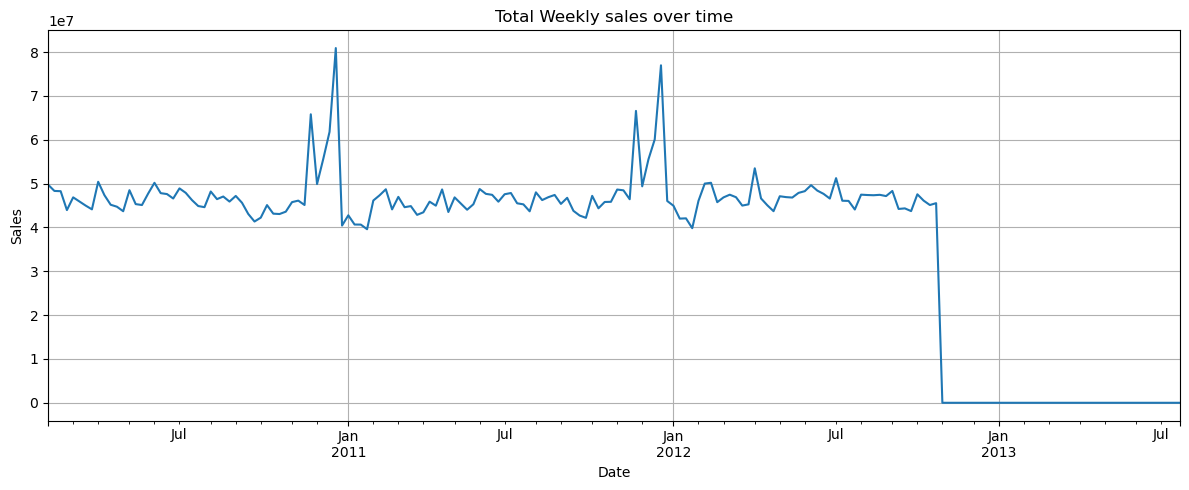

In [ ]:
plt.figure(figsize=(12, 5))
data.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly sales over time')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid()
plt.tight_layout()
plt.show()

### Feature Correlation Heatmap


In [ ]:
#This visualization is particularly useful for retail sales forecasting, as it helps identify how different factors (e.g., store location, promotions, seasonality) impact weekly sales

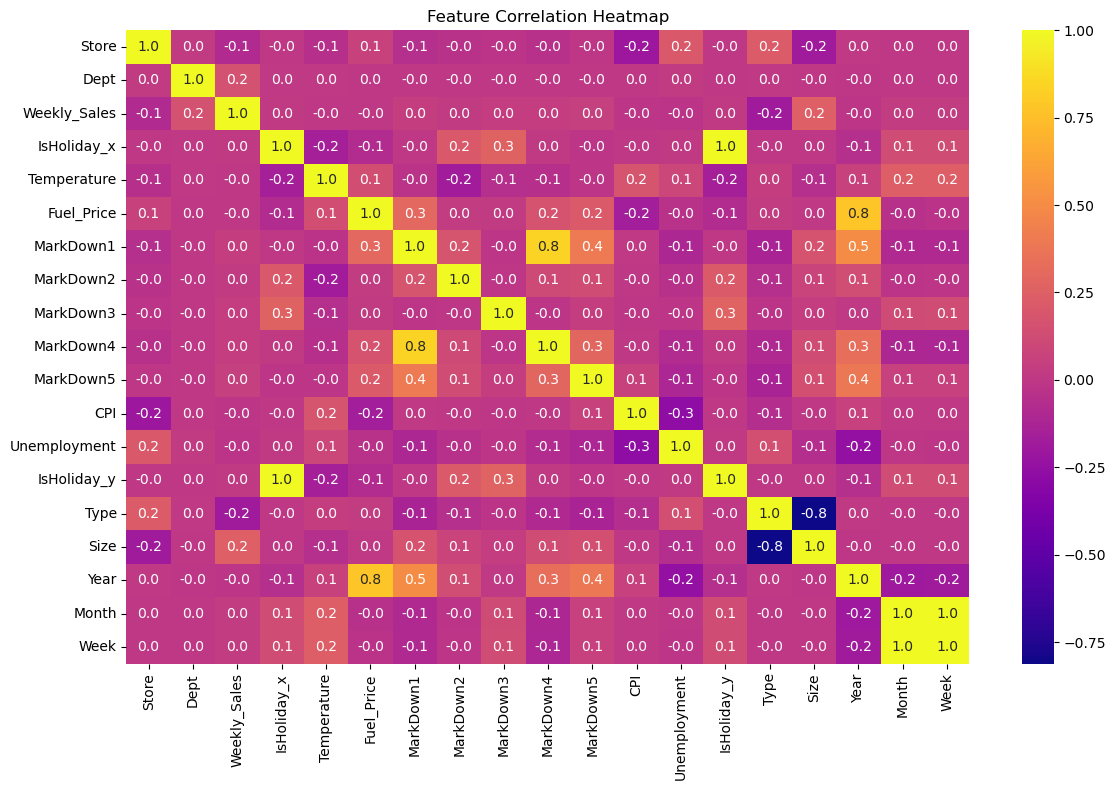

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".1f", cmap='plasma')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

### targetting feature 

In [ ]:
 X= data.drop(columns=['Weekly_Sales', 'Date', 'IsHoliday_x'])

In [ ]:
y = data['Weekly_Sales']

## LabelEncoding 

In [ ]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

categorical_cols = X.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

### Split (train-test model)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week
38530,4,93.0,80.94,3.372,16063.84,84.0,0.22,2105.39,6113.16,130.829533,4.308,False,0,205863,2012,6,24
142011,15,30.0,30.53,3.351,0.00,0.0,0.00,0.00,0.00,132.882323,7.771,False,1,123737,2011,1,1
14842,2,60.0,69.39,3.807,0.00,0.0,0.00,0.00,0.00,215.109666,7.931,False,0,202307,2011,4,16
63562,7,31.0,31.84,3.636,0.00,0.0,0.00,0.00,0.00,192.523464,8.595,False,1,70713,2011,4,16
228019,24,37.0,33.98,2.910,0.00,0.0,0.00,0.00,0.00,131.686000,8.326,False,0,203819,2010,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,27,85.0,70.00,2.942,0.00,0.0,0.00,0.00,0.00,136.324339,8.058,False,0,204184,2010,6,24
365838,39,29.0,52.45,2.943,0.00,0.0,0.00,0.00,0.00,210.182398,8.476,True,0,184109,2010,12,52
131932,14,46.0,29.67,3.179,0.00,0.0,0.00,0.00,0.00,182.571448,8.724,True,0,200898,2010,12,52
146867,15,21.0,54.23,4.055,11017.00,0.0,11.17,1287.37,2683.72,138.088267,8.150,False,1,123737,2012,5,19


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
cif=LinearRegression()

In [ ]:
cif.fit(X_train,y_train)



LinearRegression()

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# Root Mean Value

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
# Generate predictions from the model using the test features
y_pred = model.predict(X_test)

# Calculate the Root Mean Squared Error to evaluate the model's prediction accuracy
rmse = root_mean_squared_error(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')


Root Mean Squared Error: 3656.05


In [ ]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# Scatter plot 

<Axes: xlabel='Weekly_Sales'>

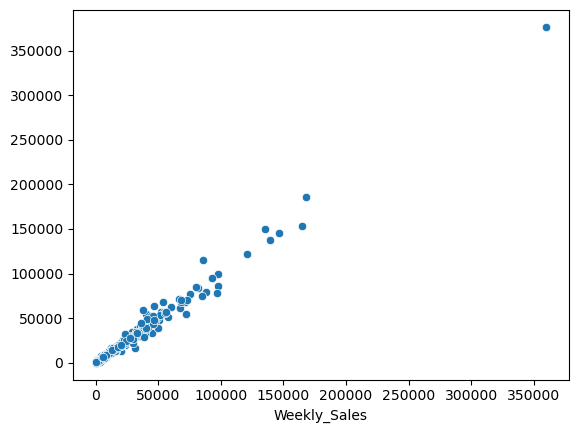

In [ ]:
sns.scatterplot(x=y_test[:500], y=y_pred[:500])

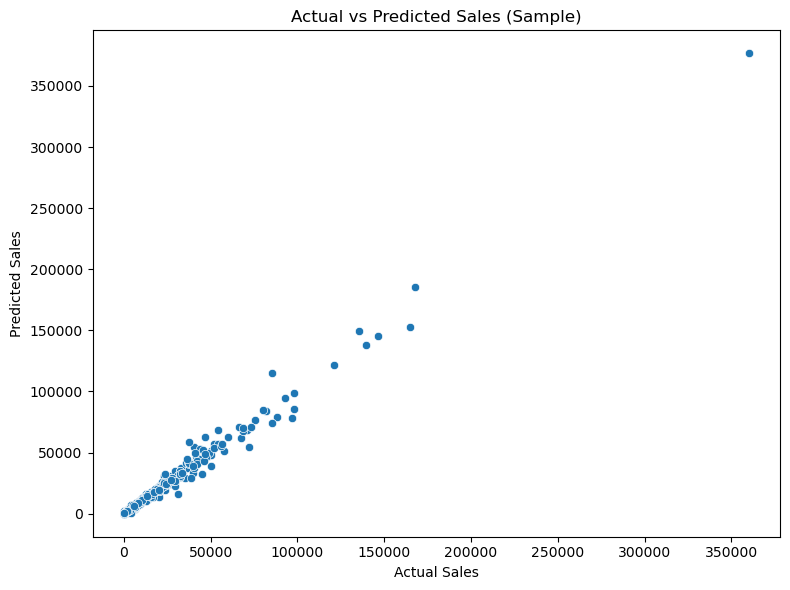

In [ ]:
# Set the size of the figure to 8 inches wide and 6 inches tall
plt.figure(figsize=(8, 6))

# Create a scatter plot comparing actual vs. predicted sales for the first 500 samples
sns.scatterplot(x=y_test[:500], y=y_pred[:500])

# Label the x-axis as 'Actual Sales'
plt.xlabel('Actual Sales')

# Label the y-axis as 'Predicted Sales'
plt.ylabel('Predicted Sales')

# Set the title of the plot to describe what it represents
plt.title('Actual vs Predicted Sales (Sample)')

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()
# Display the final plot
plt.show()

# Boxplot

In [ ]:
# Helps to compare sales performance across months.

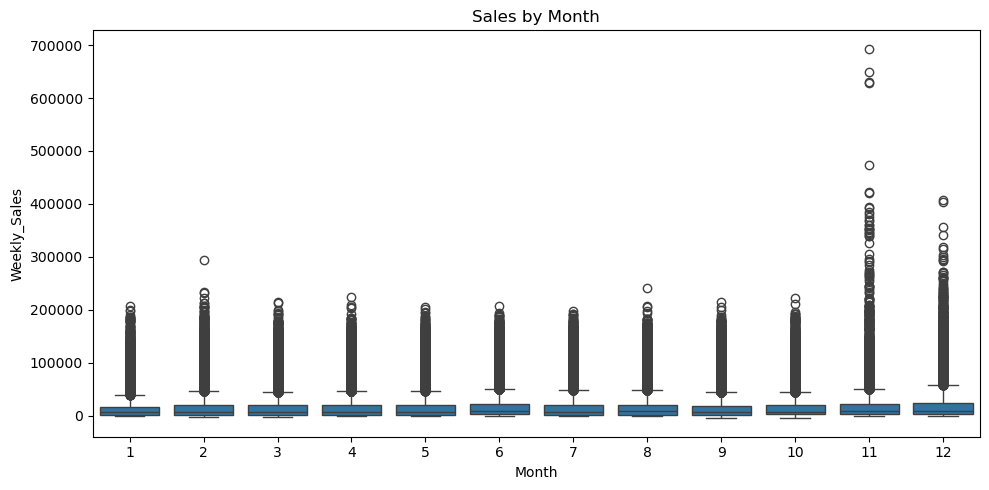

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Month', y='Weekly_Sales')
plt.title('Sales by Month')
plt.tight_layout()
plt.show()

In [ ]:
# This is the graph of category vs sales

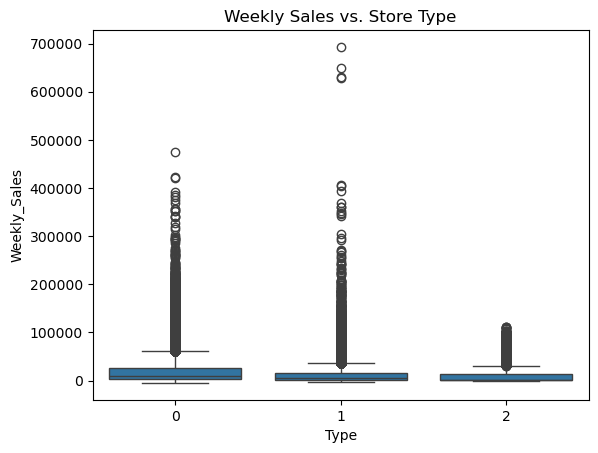

In [ ]:
 # category vs sales
 sns.boxplot(x='Type',y='Weekly_Sales', data=data)
 plt.title("Weekly Sales vs. Store Type")
 plt.show()
 df['Date'] = pd.to_datetime(data['Date'])

# Logistics Regression

In [ ]:
# import libararies for logistics regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [ ]:

# Load dataset
data = load_digits()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.97


 # Model Accuracy

In [ ]:
# Generate predictions using the trained model on the test set
y_pred = model.predict(X_test)
 # Model Accuracy
# Calculate and print the Mean Absolute Error (MAE)
print("MAE:", mean_absolute_error(y_test, y_pred))

# Calculate and print the Mean Squared Error (MSE)
print("MSE:", mean_squared_error(y_test, y_pred))

# Calculate and print the Root Mean Squared Error (RMSE)
print("RMSE:", mean_squared_error(y_test, y_pred))

# Calculate and print the R² Score (coefficient of determination)
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.06388888888888888
MSE: 0.225
RMSE: 0.225
R2 Score: 0.9708723608071432
